In [27]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from src.data.pytorch_dataset import MaskingDataset
import numpy as np
from sklearn.model_selection import GroupShuffleSplit, GroupKFold
from torchvision.transforms import v2


../data/processed/Train/images/IMG_3485.JPG
../data/processed/Train/images/IMG_3558.JPG
../data/processed/Train/images/IMG_3219.JPG
../data/processed/Train/images/IMG_2489.JPG
../data/processed/Train/images/IMG_2711.JPG
../data/processed/Train/images/IMG_3189.JPG
../data/processed/Train/images/IMG_2726.JPG
../data/processed/Train/images/IMG_3288.JPG
../data/processed/Train/images/IMG_3692.JPG
../data/processed/Train/images/IMG_2597.JPG
../data/processed/Train/images/IMG_2788.JPG
../data/processed/Train/images/IMG_3271.JPG
../data/processed/Train/images/IMG_2539.JPG
../data/processed/Train/images/IMG_3258.JPG
../data/processed/Train/images/Image128.JPG
../data/processed/Train/images/84.png


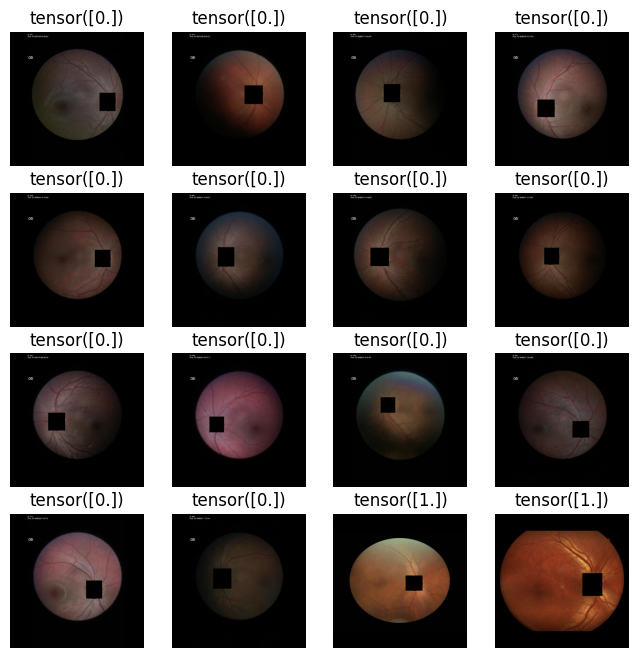

In [28]:
data = MaskingDataset(data_dir="../data/processed/Train",masking_spread=0,inverse_roi=False,bounding_box=True)
figure = plt.figure(figsize=(8, 8))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(data), size=(1,)).item()
    img, label = data[sample_idx]
    img = img.permute(1,2,0)
    figure.add_subplot(rows, cols, i)
    label = torch.FloatTensor(label)
    print(data.img_paths[sample_idx])
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [29]:
data.img_labels[data.img_labels["ImageID"].isin(["96782236244536831763179434394056352962_rztevf.png"])]["Onehot"]

Series([], Name: Onehot, dtype: object)

In [30]:
print(len(data))

1008


In [31]:
lst_labels = []
for l in data.img_labels["Onehot"]:
    lst_labels.append(l)
np.sum(lst_labels,axis=0)

array([137])

## Splitting

In [32]:
transforms = v2.Compose([
        v2.RandomRotation(degrees=45),
        v2.RandomHorizontalFlip(p=0.5),
        v2.ColorJitter(brightness=(0.7,1.1))
    ])

train_data = MaskingDataset(data_dir="../data/processed/Train",transform=None,masking_spread=0,inverse_roi=False, bounding_box=True)
BATCH_SIZE = 16
train_dataloader = DataLoader(train_data, batch_size=1)

In [33]:
train_data.img_labels[train_data.img_labels["ImageID"].isin(["96782236244536831763179434394056352962_rztevf.png"])]["Onehot"]

Series([], Name: Onehot, dtype: object)

torch.Size([1, 3, 512, 512])


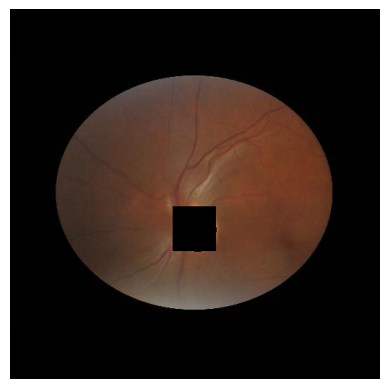

In [34]:
for i, data in enumerate(train_dataloader, 0):
    inputs, labels = data
    print(inputs.shape)
    inputs,labels = inputs.float(), torch.Tensor(np.array(labels)).float()
    plt.imshow(inputs.permute(0,2,3,1)[0])
    plt.axis("off")
    break

In [35]:
import copy
train_dataloader2 = copy.deepcopy(train_dataloader)
train_dataloader2.dataset.masking_spread = 50
train_dataloader2.dataset.masking_spread

50

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])
tensor([[1.]])


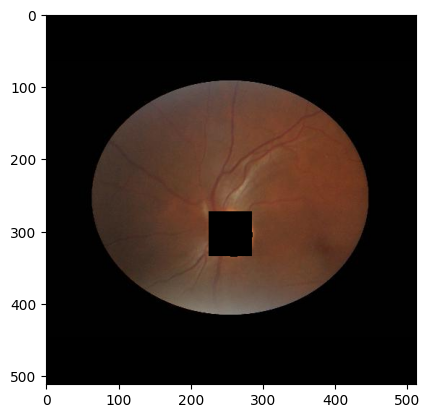

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])
tensor([[0.]])


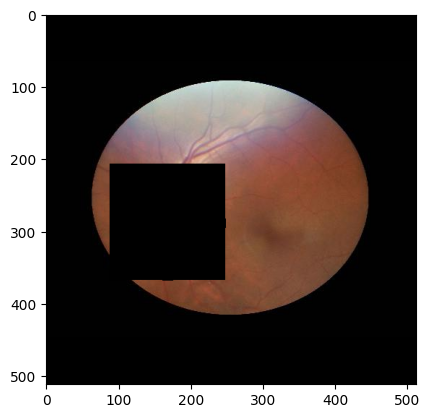

In [38]:
for i,data in enumerate(zip(train_dataloader,train_dataloader2)):
    if sum(data[0][1]) != 0:
        inputs,labels = data[0]
    else:
        inputs,labels = data[1]
    print(inputs)
    print(labels)
    plt.figure()
    plt.imshow(inputs[0].permute(1,2,0))
    plt.show()
    if sum(data[0][1]) == 0:
        break